# San Francisco Housing Rental Analysis

In this assignment, you will perform basic analysis for the San Francisco Housing Market to allow potential real estate investors to choose rental investment properties. 

In [219]:
# initial imports
import os
import pandas as pd
import numpy as np
import panel as pn
from panel.interact import interact
from panel import widgets
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px
from pathlib import Path
from dotenv import load_dotenv

%matplotlib inline

In [220]:
# Read the Mapbox API key
load_dotenv()
mapbox_token = os.getenv("MAPBOX_API_KEY")

In [221]:
# Use the len() check to see if the API key has loaded properly
len(mapbox_token)

89

In [222]:
# Set mapbox API
px.set_mapbox_access_token(mapbox_token) 

## Load Data

In [223]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function. 

Hint: Use the Pandas groupby function

Optional challenge: Use the min, max, and std to scale the y limits of the chart.

In [224]:
# Calculate the mean number of housing units per year (hint: use groupby) 
sfo_data_group = sfo_data.groupby('year').mean().drop(columns=["sale_price_sqr_foot","gross_rent"])
sfo_data_group

,housing_units
year,
2010,372560
2011,374507
2012,376454
2013,378401
2014,380348
2015,382295
2016,384242


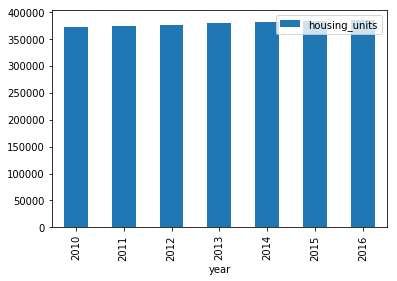

In [225]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
sfo_data_group.plot(kind="bar")

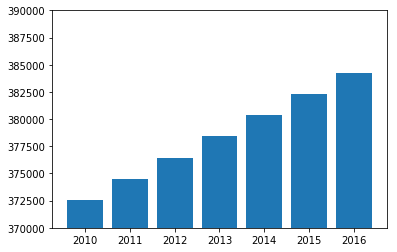

In [226]:
# Optional Challenge: Use ylim to change the range of the y-axis for a more readable bar chart
X = sfo_data_group.index
plt.ylim(370000, 390000)
plt.bar(X, sfo_data_group["housing_units"])
plt.show()

- - - 

## Average Prices per Square Foot

In this section, you will calculate the average gross rent and average sales price for each year. Plot the results as a line chart.

### Average Gross Rent in San Francisco Per Year

In [227]:
# Calculate the average gross rent and average sale price per square foot
sfo_data_group_2 = sfo_data.groupby('year').mean().drop(columns=["housing_units"])
sfo_data_group_2

,sale_price_sqr_foot,gross_rent
year,,
2010,369.344353,1239
2011,341.903429,1530
2012,399.389968,2324
2013,483.600304,2971
2014,556.277273,3528
2015,632.540352,3739
2016,697.643709,4390


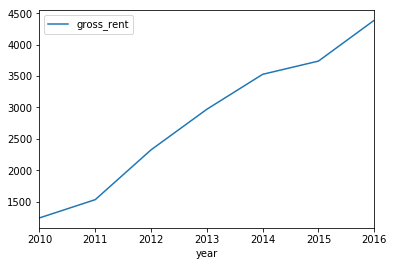

In [228]:
# Plot the Average Gross Rent per Year as a Line Chart 
sfo_data_group_3 = sfo_data_group_2.drop(columns=["sale_price_sqr_foot"])
sfo_data_group_3.plot(kind="line")

### Average Sales Price per Year

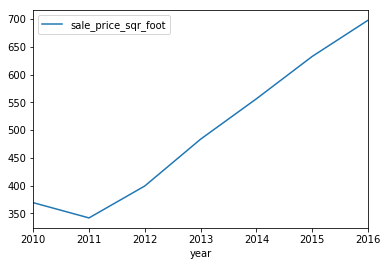

In [229]:
# Plot the Average Sales Price per Year as a line chart
sfo_data_group_4 = sfo_data_group_2.drop(columns=["gross_rent"])
sfo_data_group_4.plot(kind="line")

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create an interactive visulization of the Average Prices with a dropdown selector for the neighborhood.

Hint: It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [230]:
# Group by year and neighborhood and then create a new dataframe of the mean values
sfo_data_group_5 = sfo_data.groupby(["year", "neighborhood"]).mean()
# Remove non-sale price related columns
sfo_data_group_5 = sfo_data_group_5.drop(columns=['housing_units', 'gross_rent'])
sfo_data_group_5.head()

sale_price_sqr_foot
year neighborhood                         
2010 Alamo Square               291.182945
     Anza Vista                 267.932583
     Bayview                    170.098665
     Buena Vista Park           347.394919
     Central Richmond           319.027623

In [231]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
# First, define a function for "choose year"
def choose_neighborhood(neighborhood):
    return neighborhood

In [232]:
# Create a dataframe with only neighborhoods
sfo_neighborhood = sfo_data['neighborhood']
sfo_neighborhood.head()

year
2010        Alamo Square
2010          Anza Vista
2010             Bayview
2010    Buena Vista Park
2010    Central Richmond
Name: neighborhood, dtype: object

In [233]:
# Convert neighborhood dataframe to list
sfo_neighborhood_list = sfo_neighborhood.values.tolist()
# Remove duplicates from list
sfo_neighborhood_list = list(dict.fromkeys(sfo_neighborhood_list))
print(sfo_neighborhood_list)

['Alamo Square', 'Anza Vista', 'Bayview', 'Buena Vista Park', 'Central Richmond', 'Central Sunset', 'Corona Heights', 'Cow Hollow', 'Croker Amazon', 'Diamond Heights', 'Downtown ', 'Eureka Valley/Dolores Heights', 'Excelsior', 'Financial District North', 'Financial District South', 'Forest Knolls', 'Glen Park', 'Golden Gate Heights', 'Haight Ashbury', 'Hayes Valley', 'Hunters Point', 'Ingleside ', 'Inner Mission', 'Inner Parkside', 'Inner Richmond', 'Inner Sunset', 'Jordan Park/Laurel Heights', 'Lake --The Presidio', 'Lone Mountain', 'Lower Pacific Heights', 'Marina', 'Miraloma Park', 'Mission Bay', 'Mission Dolores', 'Mission Terrace', 'Nob Hill', 'Noe Valley', 'Oceanview', 'Outer Parkside', 'Outer Richmond ', 'Outer Sunset', 'Pacific Heights', 'Park North', 'Parkside', 'Parnassus/Ashbury Heights', 'Portola', 'Potrero Hill', 'Presidio Heights', 'Russian Hill', 'South Beach', 'South of Market', 'Sunnyside', 'Telegraph Hill', 'Twin Peaks', 'Union Square District', 'Van Ness/ Civic Cente

In [234]:
# Create the interactive drop down list from using the list of years
interact(choose_neighborhood, neighborhood=sfo_neighborhood_list)

Column
    [0] Column
        [0] Select(name='neighborhood', options=['Alamo Square', ...], value='Alamo Square')
    [1] Row
        [0] Markdown(str, name='interactive16431')

In [235]:
# First, use hvplot to display all housing sale price
sfo_data_group_5.hvplot(x='year', y='sale_price_sqr_foot', by='neighborhood', kind='scatter', alpha=0.2, persist=True)

:NdOverlay   [neighborhood]
   :Scatter   [year]   (sale_price_sqr_foot)

In [236]:
# Second, use the neighborhood drop down menu and hvplot to display housing sale price
# Define function to create plot

- - - 

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [237]:
# Getting the data from the top 10 expensive neighborhoods
# Retrieve the original dateframe without the "year" index column, group by "neighborhood", average the values
sf_data_group_6 = sfo_data.groupby(['neighborhood'], as_index=False).mean()
sf_data_group_6.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,366.020712,378401.0,2817.285714
1,Anza Vista,373.382198,379050.0,3031.833333
2,Bayview,204.588623,376454.0,2318.400000
3,Bayview Heights,590.792839,382295.0,3739.000000
4,Bernal Heights,576.746488,379374.5,3080.333333


In [238]:
# Order the new dataframe by highest sale price per square foot, and drop all rows execpt for the first 10
sf_data_group_6_sort = sf_data_group_6.sort_values('sale_price_sqr_foot', ascending=False)
sf_data_group_6_sort.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
65,Union Square District,903.993258,377427.50,2555.166667
36,Merced Heights,788.844818,380348.00,3414.000000
38,Miraloma Park,779.810842,375967.25,2155.250000
51,Pacific Heights,689.555817,378401.00,2817.285714
71,Westwood Park,687.087575,382295.00,3959.000000


In [239]:
# Set neighborhood column as index
sf_data_group_6_sorted = sf_data_group_6_sort.set_index("neighborhood")
sf_data_group_6_sorted.head()

,sale_price_sqr_foot,housing_units,gross_rent
neighborhood,,,
Union Square District,903.993258,377427.50,2555.166667
Merced Heights,788.844818,380348.00,3414.000000
Miraloma Park,779.810842,375967.25,2155.250000
Pacific Heights,689.555817,378401.00,2817.285714
Westwood Park,687.087575,382295.00,3959.000000


In [240]:
# Slice dataframe to only keep first 10 rows
sf_data_group_7 = sf_data_group_6_sorted.head(10)
sf_data_group_7

,sale_price_sqr_foot,housing_units,gross_rent
neighborhood,,,
Union Square District,903.993258,377427.50,2555.166667
Merced Heights,788.844818,380348.00,3414.000000
Miraloma Park,779.810842,375967.25,2155.250000
Pacific Heights,689.555817,378401.00,2817.285714
Westwood Park,687.087575,382295.00,3959.000000
Telegraph Hill,676.506578,378401.00,2817.285714
Presidio Heights,675.350212,378401.00,2817.285714
Cow Hollow,665.964042,378401.00,2817.285714
Potrero Hill,662.013613,378401.00,2817.285714


In [241]:
# Remove extraneous columns
sf_data_group_8 = sf_data_group_7.drop(columns=["housing_units", "gross_rent"])
sf_data_group_8.head()

,sale_price_sqr_foot
neighborhood,
Union Square District,903.993258
Merced Heights,788.844818
Miraloma Park,779.810842
Pacific Heights,689.555817
Westwood Park,687.087575


In [242]:
# Plotting the data from the top 10 expensive neighborhoods
sf_data_group_8.hvplot(kind="bar", rot=90)

:Bars   [neighborhood]   (sale_price_sqr_foot)

- - - 

## Parallel Coordinates and Parallel Categories Analysis

In this section, you will use plotly express to create parallel coordinates and parallel categories visualizations so that investors can interactively filter and explore various factors related to the sales price of the neighborhoods. 

Using the DataFrame of Average values per neighborhood (calculated above), create the following visualizations:
1. Create a Parallel Coordinates Plot
2. Create a Parallel Categories Plot

In [243]:
# Retrieve original top 10 data and move the year column out of the index column and round all values to 2 decimal places
sf_data_group_9 = sf_data_group_7.reset_index().round(decimals=2)
sf_data_group_9.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Union Square District,903.99,377427.50,2555.17
1,Merced Heights,788.84,380348.00,3414.00
2,Miraloma Park,779.81,375967.25,2155.25
3,Pacific Heights,689.56,378401.00,2817.29
4,Westwood Park,687.09,382295.00,3959.00


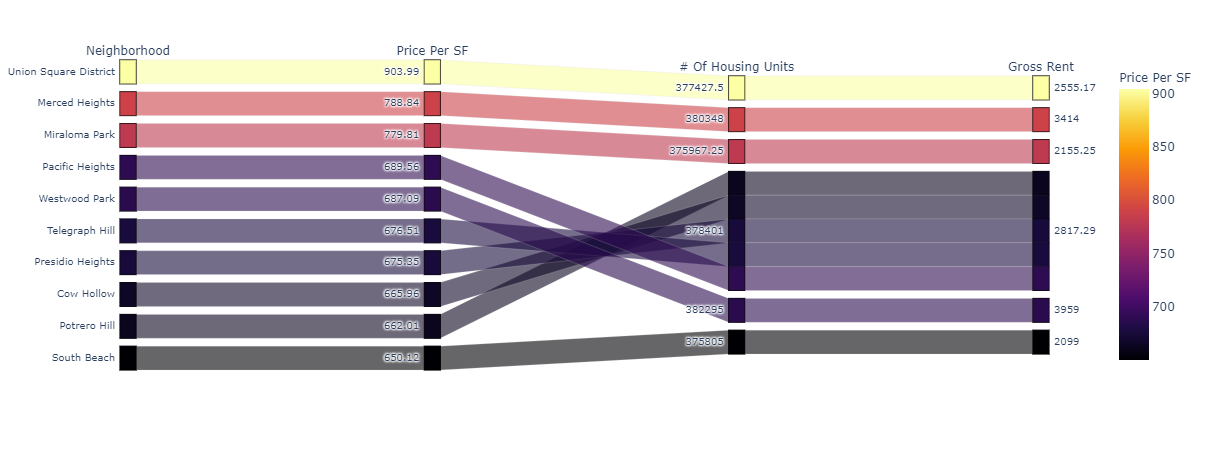

In [244]:
# Parallel Categories Plot
px.parallel_categories(
    sf_data_group_9,
    dimensions=["neighborhood", "sale_price_sqr_foot", "housing_units", "gross_rent"],
    color= "sale_price_sqr_foot",
    color_continuous_scale=px.colors.sequential.Inferno,
    labels={
        "neighborhood": "Neighborhood",
        "sale_price_sqr_foot": "Price Per SF",
        "housing_units": "# Of Housing Units",
        "gross_rent": "Gross Rent"
    },
)

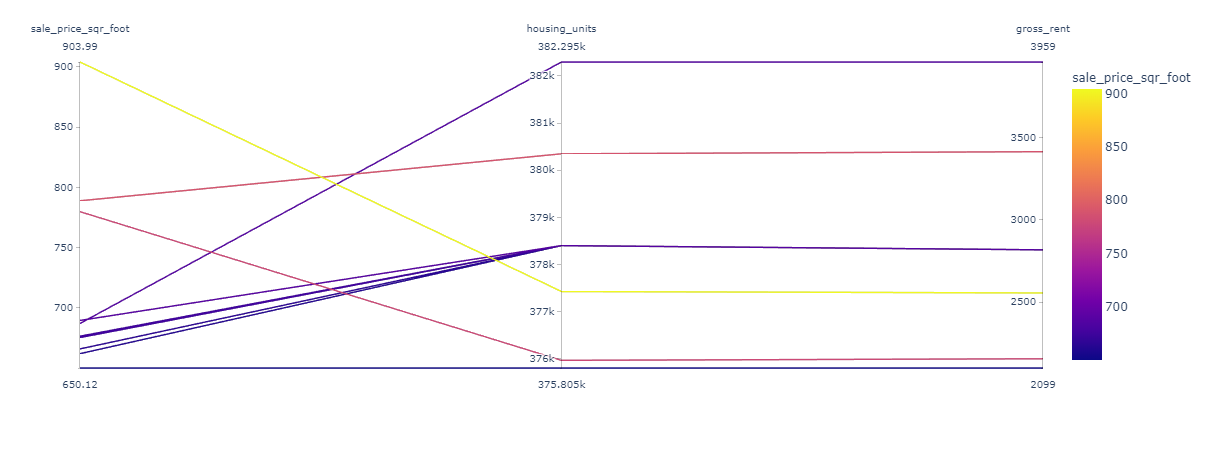

In [245]:
# Parallel Coordinates Plot
px.parallel_coordinates(sf_data_group_9, color='sale_price_sqr_foot')

- - - 

## Neighborhood Map

In this section, you will read in neighboor location data and build an interactive map with the average prices per neighborhood. Use a scatter_mapbox from plotly express to create the visualization. Remember, you will need your mapbox api key for this.

### Load Location Data

In [246]:
# Load neighborhoods coordinates data
file_path = Path("Data/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)
df_neighborhood_locations.head()

,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


### Data Preparation

You will need to join the location data with the mean prices per neighborhood

1. Calculate the mean values for each neighborhood
2. Join the average values with the neighborhood locations

In [247]:
# Calculate the mean values for each neighborhood
sf_data_group_6.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,366.020712,378401.0,2817.285714
1,Anza Vista,373.382198,379050.0,3031.833333
2,Bayview,204.588623,376454.0,2318.400000
3,Bayview Heights,590.792839,382295.0,3739.000000
4,Bernal Heights,576.746488,379374.5,3080.333333


In [248]:
# Join the average values with the neighborhood locations
sf_data_group_6_joined = pd.concat([sf_data_group_6, df_neighborhood_locations], axis="columns", join="inner").round(decimals=2)
sf_data_group_6_joined.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent,Neighborhood,Lat,Lon
0,Alamo Square,366.02,378401.0,2817.29,Alamo Square,37.79,-122.40
1,Anza Vista,373.38,379050.0,3031.83,Anza Vista,37.78,-122.44
2,Bayview,204.59,376454.0,2318.40,Bayview,37.73,-122.40
3,Bayview Heights,590.79,382295.0,3739.00,Bayview Heights,37.73,-122.41
4,Bernal Heights,576.75,379374.5,3080.33,Bernal Heights,37.73,-122.44


### Mapbox Visualization

Plot the aveage values per neighborhood with a plotly express scatter_mapbox visualization.

In [249]:
mapbox_token

'pk.eyJ1IjoiamtwMDU4NiIsImEiOiJja2F4Nzc5a3owMjMxMzBvOTNnaDV0d3IwIn0.UMp9LzCDYq7rdaZL7Tfo0A'

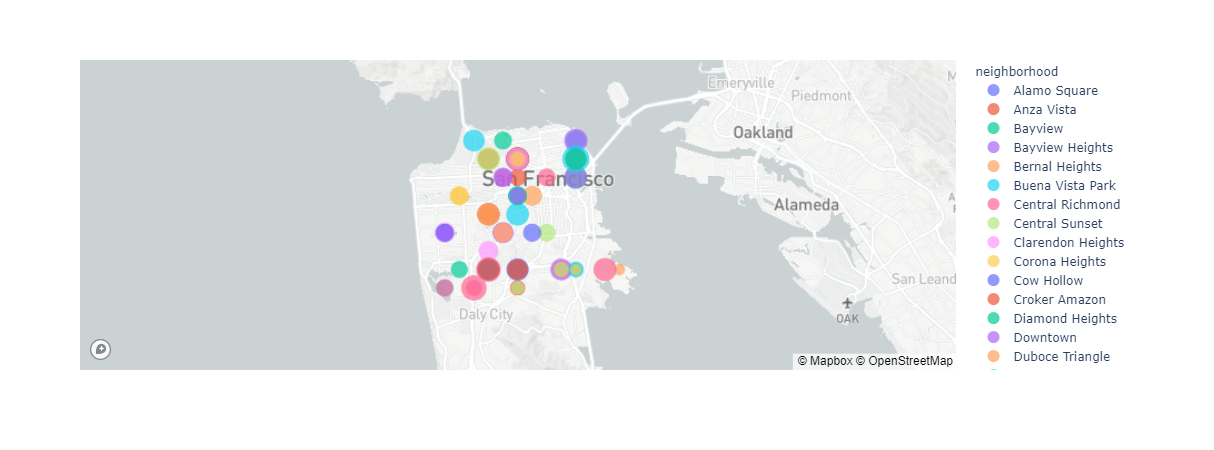

In [250]:
# Create a scatter mapbox to analyze neighborhood info
map = px.scatter_mapbox(
    sf_data_group_6_joined,
    lat="Lat",
    lon="Lon",
    size="sale_price_sqr_foot",
    color="neighborhood",
    zoom=10
)

# Display the map
map.show()